# GemPy test models
This small presentation notebook will cover some simple models build in [GemPy](https://github.com/cgre-aachen/gempy) to showcase necessary inputs and the behaviour of some of its features.  
1. Minimum required input data  
2. How Series work  
    2.1 Model 2 layers in 1 Series  
    2.2 Model 2 layers in 2 Series  
3. Position of orientation data  
4. Fault relations  
5. Onlap relations  
6. Topography  

In [1]:
import gempy as gp
%matplotlib inline

# Minimum required input data  
GemPy needs two different input data for creating a model: *interface* and *orientation* data. 
*Interfaces* can easily be understood as the ... well ... interface between two geological units. These can, e.g. be mapped in the Field.  
So can *Orientation* measurements (usually with a compass). They comprise two angles here, the `azimuth` $\sigma$ and `dip` $\varphi$  
![orientation_wiki](https://upload.wikimedia.org/wikipedia/commons/8/80/Streichbild.svg)  

| x  |  y |  z |  azimuth | dip  | polarity  |  Formation |
|--:|--:|--:|--:|--:|--:|---|
| 300  | 250  | 545  | 90  | 10  |  1 | sandstone  |
|  300 |  550 |  680 |  90 | 15  |  1 | limestone  |

## Minimum example  
The bare minimum to define an interface between two geological units is two *interface* points and one *orientation* point.

In [2]:
geo_model = gp.create_model('Simple_model')

In [3]:
gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/00_1Layer_simple_model_interfaces.csv',
            path_o = '../data/00_1Layer_simple_model_orientation.csv');

Active grids: ['regular']


In [4]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,unit_2,Default series,1,False,#015482,1
1,basement,Basement,1,True,#9f0052,2


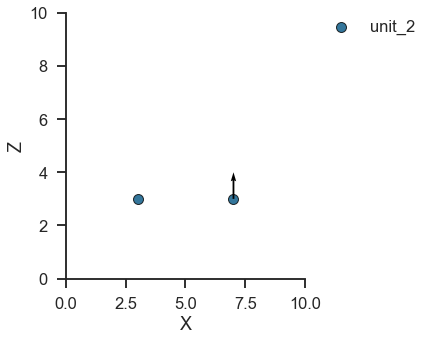

In [5]:
gp.plot.plot_data(geo_model)

In [6]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [7]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

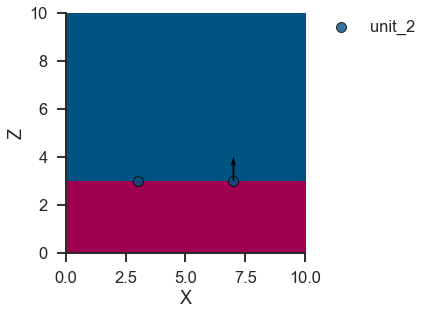

In [8]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

## How Series work  
### A model with 2 layers in 1 Series
Extending the minimum example to a second set of interface points helps to test how `Series` work in GemPy.

In [9]:
geo_model = gp.create_model('2Layer_model')

In [10]:
gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/01_2Layer_simple_model_interfaces.csv',
            path_o = '../data/01_2Layer_simple_model_orientation.csv');

Active grids: ['regular']


In [11]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,unit_1,Default series,1,False,#015482,1
1,unit_2,Default series,2,False,#9f0052,2
2,basement,Basement,1,True,#ffbe00,3


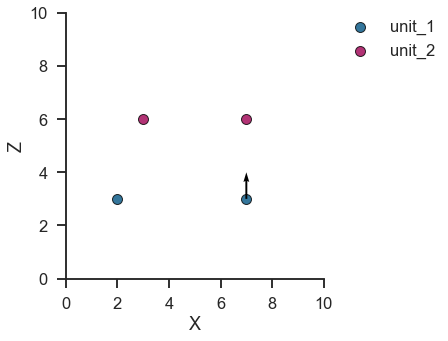

In [12]:
gp.plot.plot_data(geo_model)

In [13]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [14]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

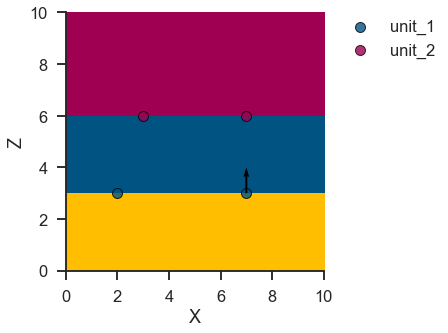

In [15]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This works only, because both layers are in the **same** Series, `default_series`.   
But what happens, if we define 2 series for the 2 units we have?

### A model with 2 layers in 2 series

In [16]:
gp.map_series_to_surfaces(geo_model,
                         {"Series_1": 'unit_1',
                         "Series_2": 'unit_2'})

,surface,series,order_surfaces,isBasement,color,id
0,unit_1,Series_1,1,False,#015482,1
1,unit_2,Series_2,1,False,#9f0052,2
2,basement,Basement,1,True,#ffbe00,3


In [17]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [18]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)
## This will cause an error, and that is on purpose ##

ValueError: Empty data passed with indices specified.

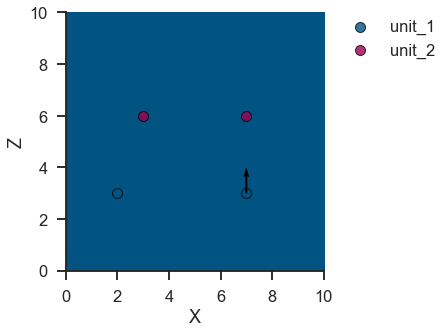

In [19]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This shows that one *orientation* is still enough for modeling 2 layers, **if** these are arranged in the same [Series](https://gempy.readthedocs.io/Data/data.Series.html#data.Series). Generally however, each unit should have **at least** two *interface* points and one *orientation* point.

### A model with 2 layers in 2 Series  
#### ... and enough input data

In [20]:
geo_model = gp.create_model('2layers_2series')

gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/02_2Layer_simple_model_interfaces.csv',
            path_o = '../data/02_2Layer_simple_model_2orientation.csv');

Active grids: ['regular']


In [21]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,unit_1,Default series,1,False,#015482,1
1,unit_2,Default series,2,False,#9f0052,2
2,basement,Basement,1,True,#ffbe00,3


Note that both units belong to the same Series here (`Default series`).

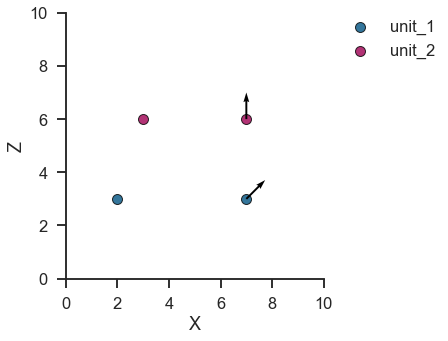

In [22]:
gp.plot.plot_data(geo_model)

In [23]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [24]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

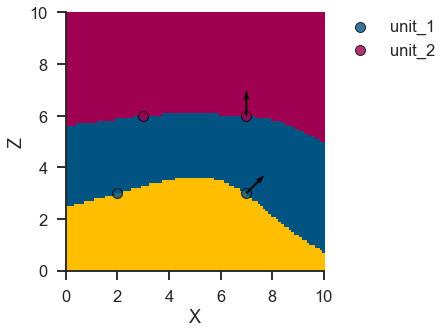

In [25]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This model doesn't change, when we switch the formation of the orientations. Right now, the orientation point at Z=6 belongs to *unit_2* and the orientation point at Z=3 to *unit_1*. Let's switch those:

In [26]:
geo_model = gp.create_model('2layers_2series')

gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/02_2Layer_simple_model_interfaces.csv',
            path_o = '../data/02_2Layer_simple_model_2orientation2.csv');
geo_model.orientations

Active grids: ['regular']


,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,7,1,6,0.7501,0.5001,0.6501,1.000000e-12,1.000000e-12,1.000000,0,90,1,unit_1,Default series,1,1,0.01
1,7,1,3,0.7501,0.5001,0.3501,7.071068e-01,1.000043e-12,0.707107,45,90,1,unit_2,Default series,2,1,0.01


In [27]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [28]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

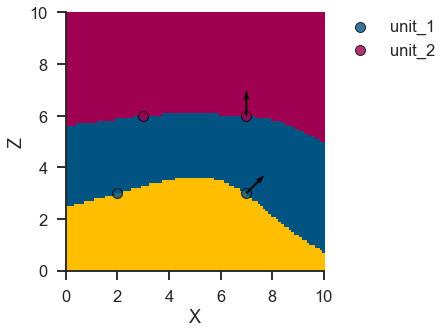

In [29]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

This changes however, if we assign the units to different series. Looking at the orientation data in the example, this is reasonable, as units in one series share the interpolation parameters. So, comprising units in a series is logical if they have a comparable spatial trend / geometry.

In [30]:
gp.map_series_to_surfaces(geo_model,
                         {"Series_2": 'unit_2',
                         "Series_1": 'unit_1'})

,surface,series,order_surfaces,isBasement,color,id
1,unit_2,Series_2,1,False,#9f0052,1
0,unit_1,Series_1,1,False,#015482,2
2,basement,Basement,1,True,#ffbe00,3


In [31]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [32]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

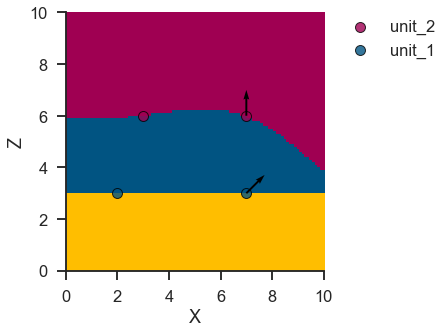

In [33]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y', show_data=True)

# Position of Orientation Data
*Orientation* data defines the underlying gradient field (its direction) and its location is important for the resulting model. In the following, we change the depth of *orientation* data points in the model:

In [34]:
geo_model_shallow = gp.create_model('shallow_orientation')

In [35]:
gp.init_data(geo_model_shallow, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/03_2Layer_simple_model_interfaces.csv',
            path_o = '../data/03_2Layer_simple_model_2orientation_shallow.csv');

Active grids: ['regular']


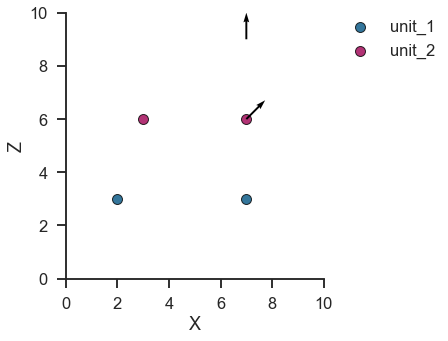

In [36]:
gp.plot.plot_data(geo_model_shallow)

In [37]:
geo_model_deep = gp.create_model('deep_orientation')

In [38]:
gp.init_data(geo_model_deep, [0, 10., 0, 2., 0, 10.], [100, 3, 100],
            path_i = '../data/03_2Layer_simple_model_interfaces.csv',
             path_o = '../data/03_2Layer_simple_model_2orientation_deep.csv', default_values=True);

Active grids: ['regular']


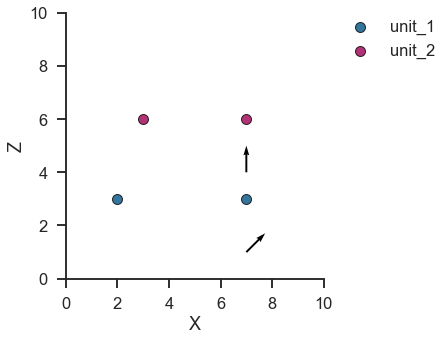

In [39]:
gp.plot.plot_data(geo_model_deep)

In [40]:
# Create the theano model
gp.set_interpolation_data(geo_model_shallow,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [41]:
# Compute the model
sol = gp.compute_model(geo_model_shallow, compute_mesh=False)

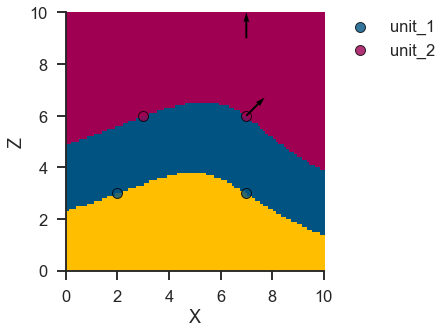

In [42]:
gp.plot.plot_section(geo_model_shallow, cell_number=2, direction='y', show_data=True)

In [43]:
# Create the theano model
gp.set_interpolation_data(geo_model_deep,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [44]:
# Compute the model
sol = gp.compute_model(geo_model_deep, compute_mesh=False)

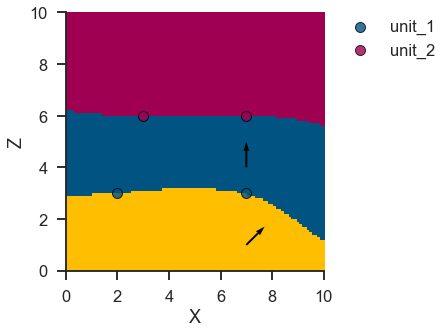

In [45]:
gp.plot.plot_section(geo_model_deep, cell_number=2, direction='y', show_data=True)

# Fault relations 
Let's introduce a common feature of geological models: faults. Faults are discontinuities, displacing rock units. In GemPy, Faults are modeled similarly to geologcial units, but distort the potential field of geological units. The result is the fault displacement.

In [157]:
geo_model = gp.create_model('2layers_2faults')

gp.init_data(geo_model, [0., 10., 0., 2., 0., 10.], [100, 3, 100],
            path_i = '../data/04_2Layers_2Faults_interfaces.csv',
            path_o = '../data/04_2Layers_2Faults_orientations.csv');

Active grids: ['regular']


In [158]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,unit_1,Default series,1,False,#015482,1
1,unit_2,Default series,2,False,#9f0052,2
2,fault1,Default series,3,False,#ffbe00,3
3,fault2,Default series,4,False,#728f02,4
4,basement,Basement,1,True,#443988,5


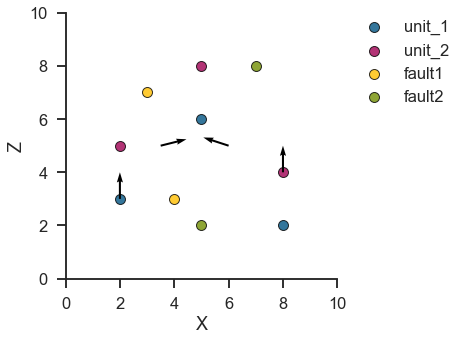

In [159]:
gp.plot.plot_data(geo_model)

In [160]:
gp.map_series_to_surfaces(geo_model,
                         {"Fault2_series":'fault2',
                          "Fault1_series":'fault1',
                          "Strati_series":('unit_2', 'unit_1')})

,surface,series,order_surfaces,isBasement,color,id
3,fault2,Fault2_series,1,False,#728f02,1
2,fault1,Fault1_series,1,False,#ffbe00,2
0,unit_1,Strati_series,1,False,#015482,3
1,unit_2,Strati_series,2,False,#9f0052,4
4,basement,Basement,1,True,#443988,5


In [194]:
geo_model.set_is_fault(['Fault1_series', 'Fault2_series'], change_color=True)
#geo_model.set_is_finite_fault(series_fault=['Fault2_series'], toggle=True)

,isFault,isFinite
Fault2_series,True,False
Fault1_series,True,False
Strati_series,False,False
Basement,False,False


In [195]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [196]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

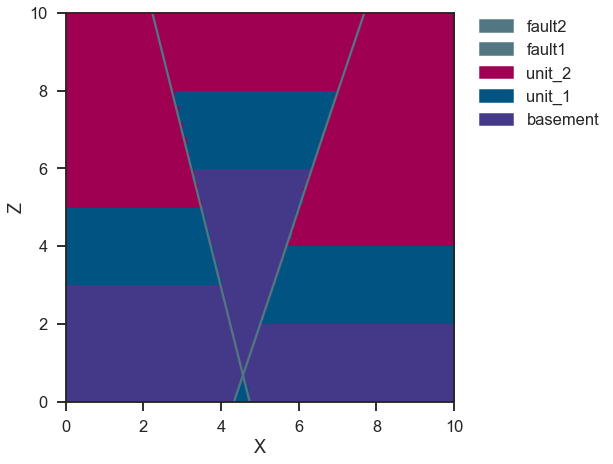

In [197]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

We see that faults cross cut at the bottom without displacement. This is not realistic and also causes an error in the model (unit one is modeled between the faults. We can, however, set fault relations:

In [198]:
# table of fault relations
geo_model.faults.faults_relations_df

,Fault2_series,Fault1_series,Strati_series,Basement
Fault2_series,False,False,True,True
Fault1_series,False,False,True,True
Strati_series,False,False,False,False
Basement,False,False,False,False


In [199]:
fr = np.array([[False, True, True, True],
               [False, False, True, True],
               [False, False, False, False],
               [False, False, False, False]])

In [200]:
geo_model.faults.set_fault_relation(fr)

,Fault2_series,Fault1_series,Strati_series,Basement
Fault2_series,False,True,True,True
Fault1_series,False,False,True,True
Strati_series,False,False,False,False
Basement,False,False,False,False


In [201]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [202]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

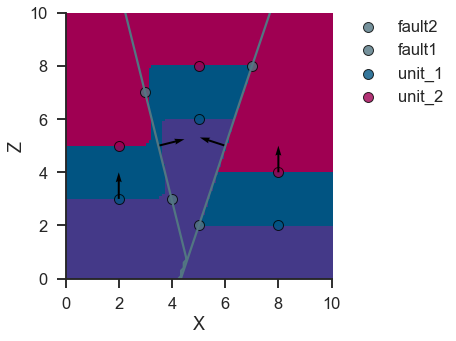

In [203]:
gp.plot.plot_section(geo_model, cell_number=1, direction='y', show_data=True)

## Onlap test

In [204]:
geo_model = gp.create_model('Test_model')

In [205]:
gp.init_data(geo_model, [0, 10., 0, 2., 0, 5.], [100, 3, 100],
            path_o = '../data/05_toy_fold_unconformity_orientations.csv',
             path_i = '../data/05_toy_fold_unconformity_interfaces.csv', default_values=True);

Active grids: ['regular']


In [206]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,Basefold,Default series,1,False,#015482,1
1,Topfold,Default series,2,False,#9f0052,2
2,Inclined,Default series,3,False,#ffbe00,3
3,Flat,Default series,4,False,#728f02,4
4,basement,Basement,1,True,#443988,5


In [207]:
gp.map_series_to_surfaces(geo_model,
                         {"Flat_Series":'Flat',
                          "Inclined_Series":'Inclined',
                          "Fold_Series": ('Basefold', 'Topfold')})

,surface,series,order_surfaces,isBasement,color,id
3,Flat,Flat_Series,1,False,#728f02,1
2,Inclined,Inclined_Series,1,False,#ffbe00,2
0,Basefold,Fold_Series,1,False,#015482,3
1,Topfold,Fold_Series,2,False,#9f0052,4
4,basement,Basement,1,True,#443988,5


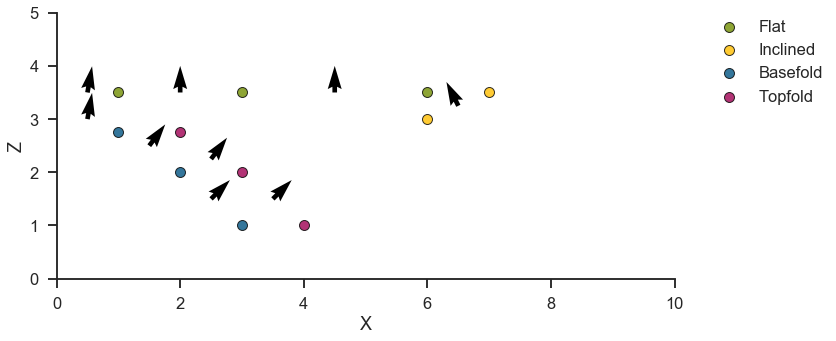

In [208]:
gp.plot.plot_data(geo_model, direction='y')

In [209]:
geo_model.series

,order_series,BottomRelation
Flat_Series,1,Erosion
Inclined_Series,2,Erosion
Fold_Series,3,Erosion
Basement,4,Erosion


In [210]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Compilation Done!


In [211]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

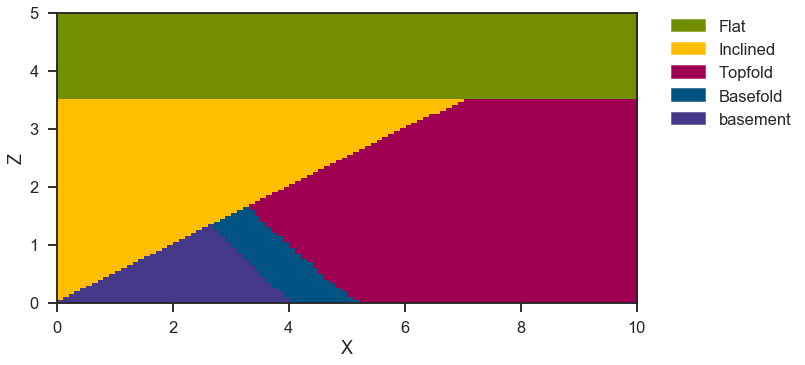

In [212]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

## Inclined as ONLAP

In [213]:
# so let's set the Pregraben_Series to Onlap
geo_model.series.set_bottom_relation('Inclined_Series', bottom_relation='Onlap')

,order_series,BottomRelation
Flat_Series,1,Erosion
Inclined_Series,2,Onlap
Fold_Series,3,Erosion
Basement,4,Erosion


In [214]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

Compiling theano function...
Compilation Done!


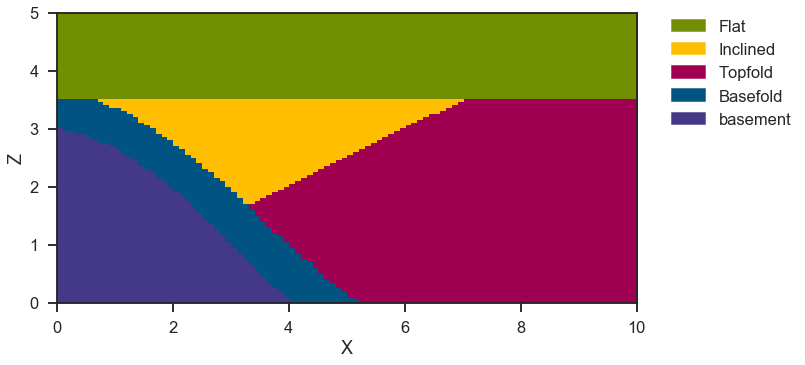

In [215]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')

## Inclined and Flat as ONLAP

In [216]:
# so let's set the Pregraben_Series to Onlap
geo_model.series.set_bottom_relation(['Flat_Series','Inclined_Series'], bottom_relation='Onlap')

,order_series,BottomRelation
Flat_Series,1,Onlap
Inclined_Series,2,Onlap
Fold_Series,3,Erosion
Basement,4,Erosion


In [217]:
# Create the theano model
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=False)

Compiling theano function...
Compilation Done!


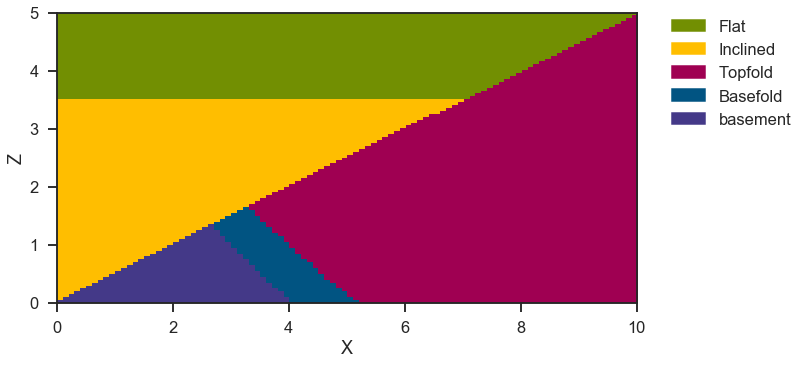

In [218]:
gp.plot.plot_section(geo_model, cell_number=2, direction='y')